In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm
from torchvision import datasets
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
train_set=datasets.MNIST('data', train=True, download=True)
test_set=datasets.MNIST('data', train=False, download=True)
X_train = train_set.data.numpy().reshape(-1,28*28).astype('float32')/255.0
X_test = test_set.data.numpy().reshape(-1,28*28).astype('float32')/255.0
y_train = train_set.targets.numpy().astype('int32')
y_test = test_set.targets.numpy().astype('int32')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)
print(np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test))

(60000, 784) (10000, 784) (60000,) (10000,)
float32 float32 int32 int32
0.0 1.0 0.0 1.0


In [3]:
def plot_1D(ax, X, y, name):
    ax.scatter(X[:, 0], np.zeros(X.shape[0]), c=y, cmap=cm.rainbow, alpha=0.5)
    ax.set_title(name+" 1D")


def plot_2D(ax, X, y, name):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.rainbow, alpha=0.5)
    ax.set_title(name+" 2D")


def plot_3D(ax, X, y, reduction_name):
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cm.rainbow, alpha=0.5)

    # 显示标记
    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    ax.set_title(reduction_name+" 3D")
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:23: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:24: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:25: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/opt/anaconda3/envs/pytorch2/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/envs/pytorch2/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:23: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:24: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:25: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:23: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis ins

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:23: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:24: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:25: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/vt/wh2j_rxx31d5r27bcqtrv_tc0000gn/T/ipykernel_1101/1730233092.py:23: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis ins

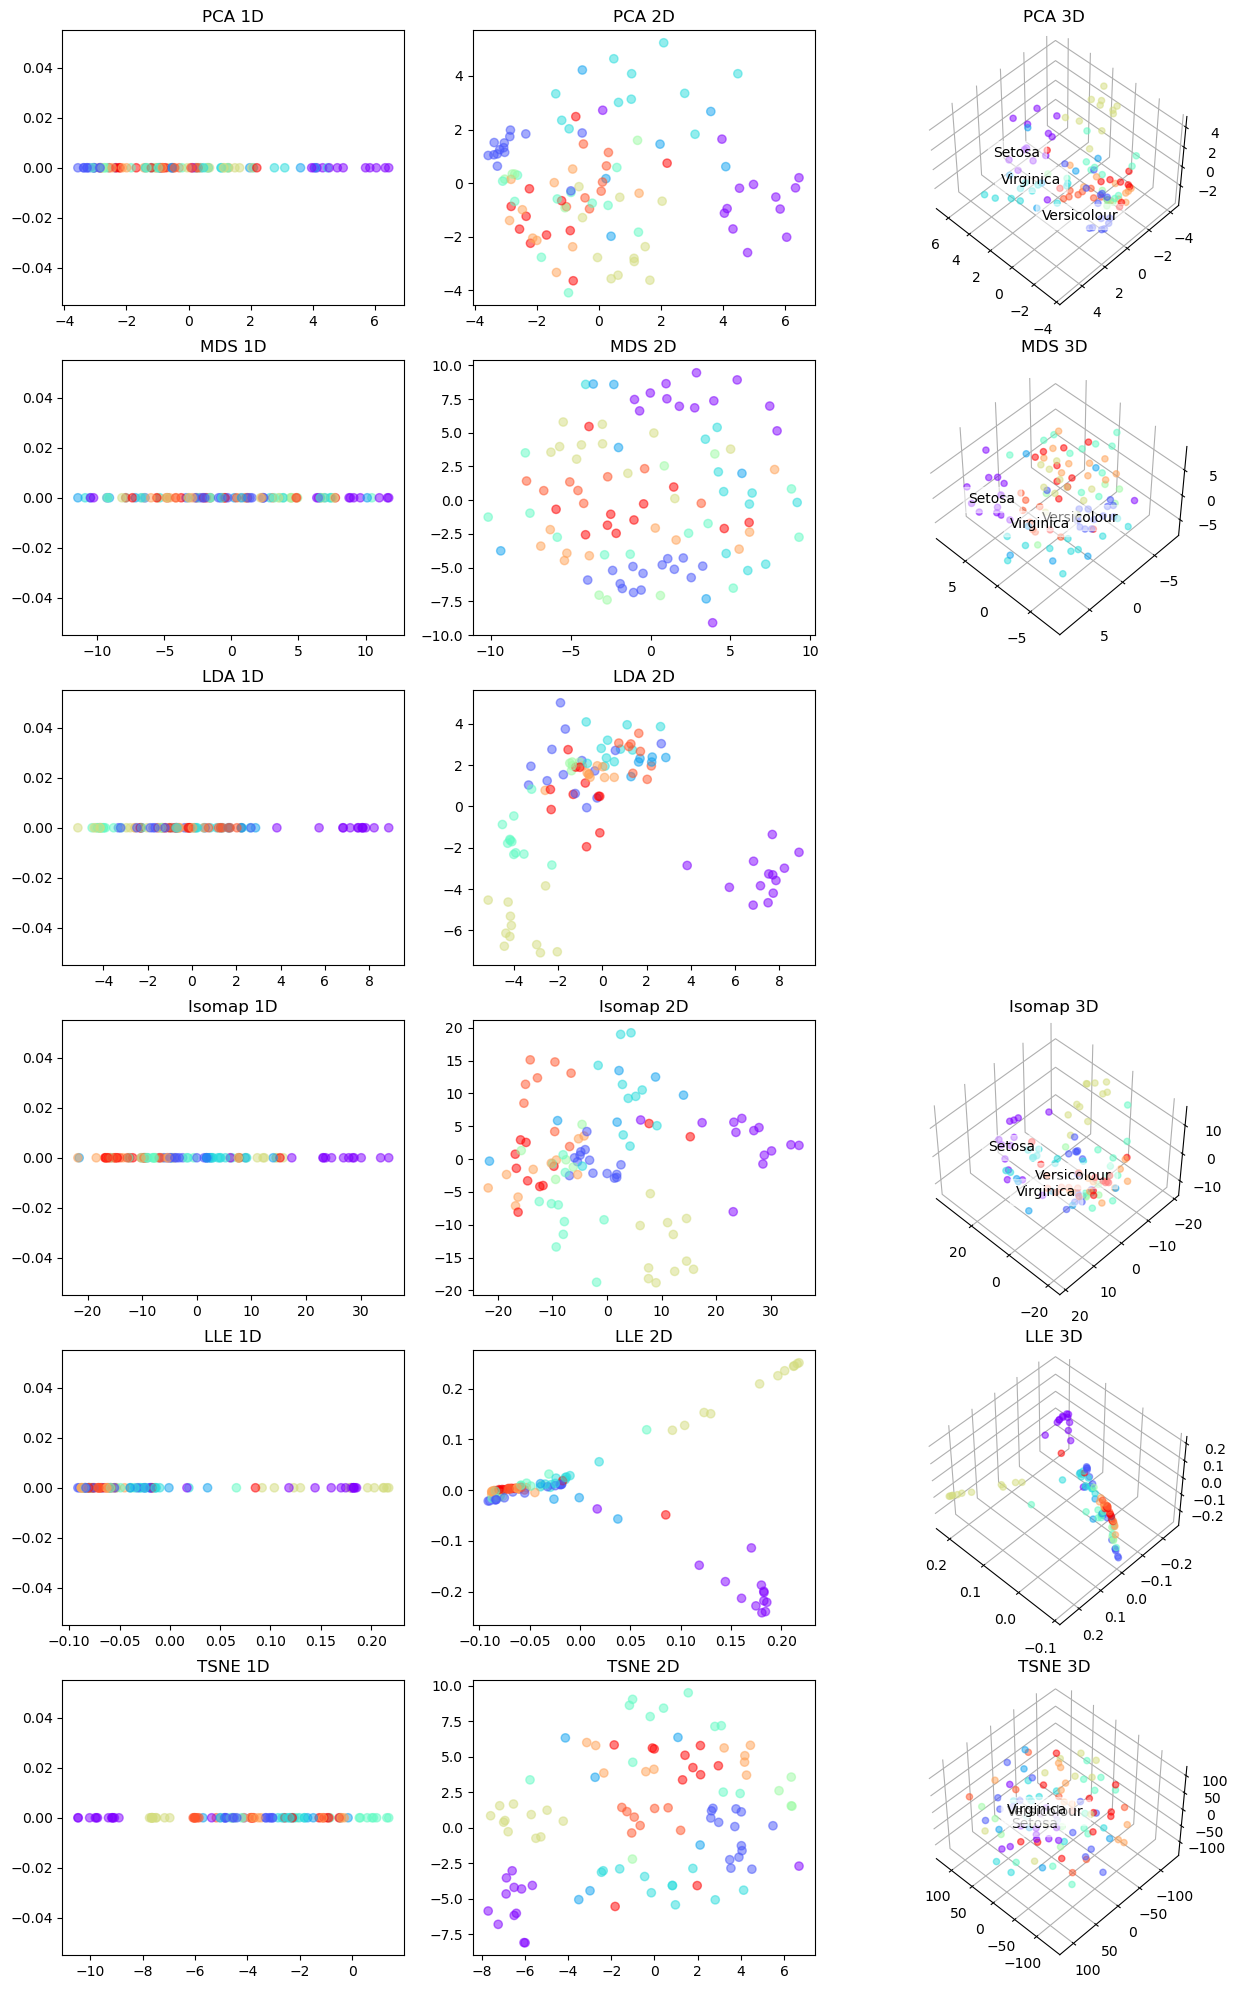

In [4]:
D_reductions = [PCA, MDS, LDA, Isomap, LLE, TSNE]
plots = [plot_1D, plot_2D, plot_3D]
names = ['PCA', 'MDS', 'LDA', 'Isomap', 'LLE', 'TSNE']

# MNIST
n = 1
data_limits = 100  # 取前 100 个数据
fig = plt.figure(figsize=(15, 25), dpi=100)
for index, reduction in enumerate(D_reductions):
    for i in range(3):
        if reduction == LDA and i == 2:
            n += 1
            continue
        X = X_train[:data_limits]
        y = y_train[:data_limits]
        instance = reduction(n_components=i+1)
        X = instance.fit_transform(X, y)
        if i < 2:
            ax = fig.add_subplot(len(D_reductions), 3, n, frameon=True)
        else:
            ax = fig.add_subplot(len(D_reductions), 3, n,
                                 elev=48, azim=134, projection='3d')
        plots[i](ax, X, y, names[index])
        n += 1

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


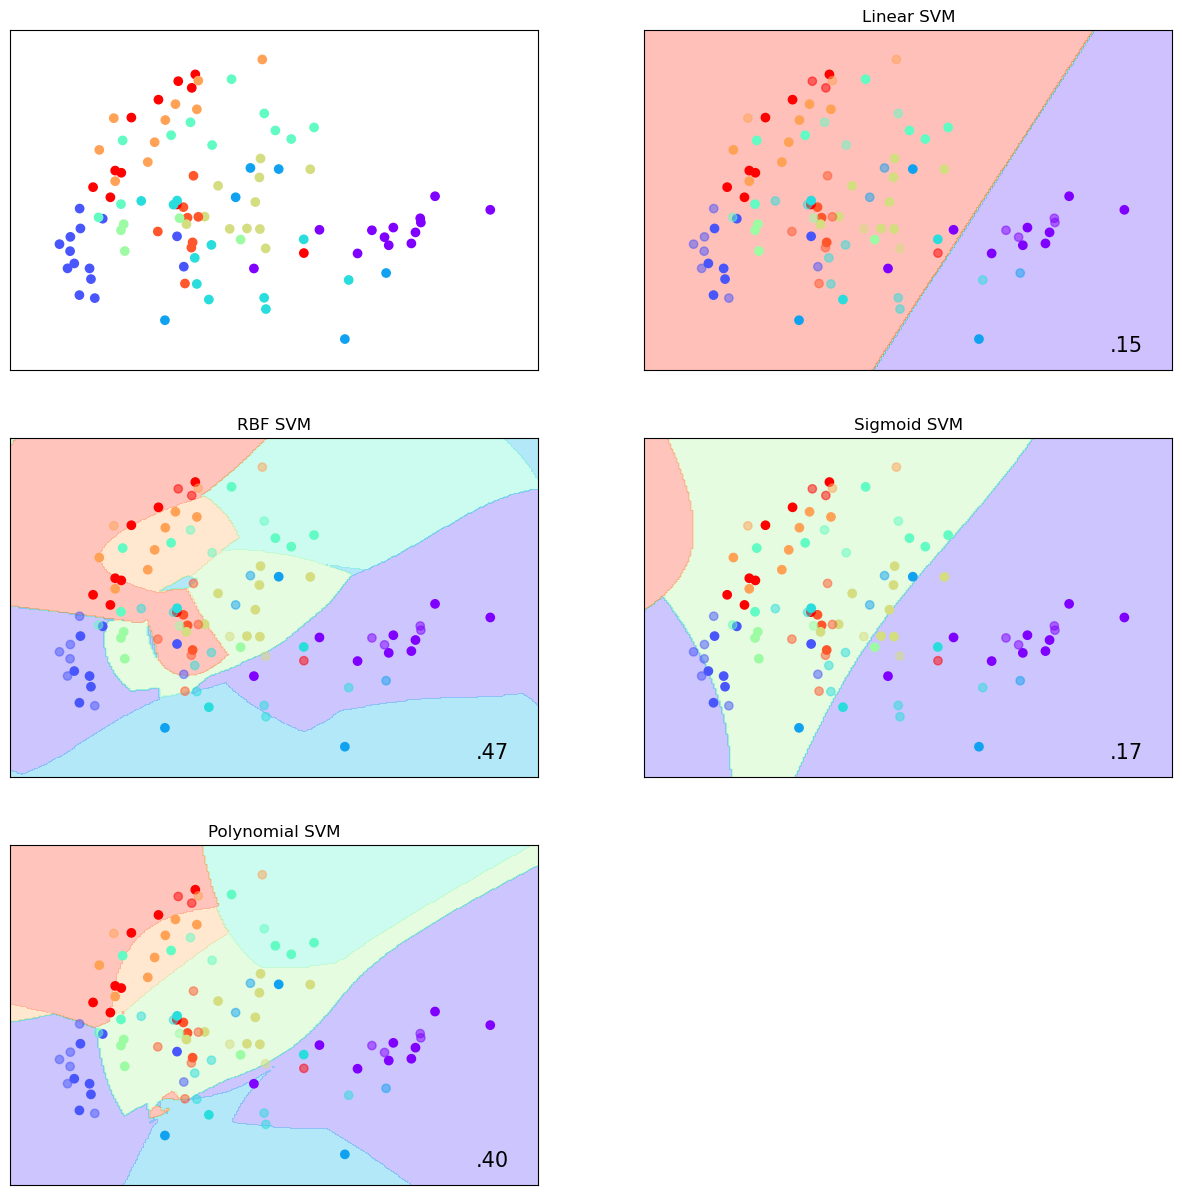

In [5]:
pca = PCA(n_components=2)
pca.fit(X_train, y_train)
X_t = pca.transform(X_train)
stacked = np.hstack([X_t, y_train.reshape(y_train.shape[0], -1)])
h = .02

names = ["Linear SVM", "RBF SVM", "Sigmoid SVM", "Polynomial SVM"]

classifiers = [SVC(kernel="linear", C=0.001), SVC(kernel="rbf", C=10), SVC(kernel="sigmoid", C=0.1), SVC(kernel="poly", C=10)]

# 对降维后的 MNIST 进行分类

mnist_t = [stacked[:100, :-1], stacked[:100, -1]]

datasets = [mnist_t]

figure = plt.figure(figsize=(15, 15), dpi=100)
i = 1

for ds in datasets:
    # 数据预处理
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 先绘制原始数据
    cm = plt.cm.rainbow
    ax = plt.subplot(len(datasets)*3, (len(classifiers) + 3)//3, i)
    # training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm)
    # testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets)*3, (len(classifiers) + 3)//3, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # 绘制决策边界
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # 决策边界
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.3)

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm,
                   alpha=0.5)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.show()